# Przykładowy notebook używający Pythona

#### Model fermentacji okresowej z równaniem typu Monoda do opisu wzrostu biomasy (X), konsumpcji substratu (S) i wytwarzania produktu (P). Węcej informacji:https://github.com/sbednarz/modeling str. 123

## Import bibliotek

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
# File 47-1.py
# Example 47. Fermentation - Monod model
# Copyright (C) 2016, Szczepan Bednarz
# Released under the GNU General Public License

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint



## Model procesu

In [11]:
# Fermentation (Monod growth kinetics)
def model(y, t):
    X = y[0]
    S = y[1]
    P = y[2]
    mi = mi_max * S/(KM + S)
    dXdt = X * mi
    dSdt = -1/Y_XS * X * mi
    dPdt = Y_PX * X * mi
    return [dXdt, dSdt, dPdt]



## Paramery modelu

In [12]:
KM = 0.4 # g/L
Y_XS = 0.5
Y_PX = 0.1
mi_max = 1 # 1/h


# Experiment with different values:
X0 = 0.1 # g/L
S0 = 10  # g/L
P0 = 0   # g/L



## Obliczenia i raportowanie wyników (wykres)

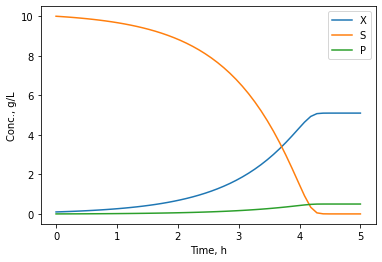

In [13]:
t = np.linspace(0, 5) # 0-5h
results = odeint( model, [X0, S0, P0], t)
X = results[:,0]
S = results[:,1]
P = results[:,2]
plt.plot(t,X, label='X')
plt.plot(t,S, label='S')
plt.plot(t,P, label='P')
plt.xlabel('Time, h')
plt.ylabel('Conc., g/L')
plt.legend()
